<h2>Importing the necessary libraries</h2>
scikit learn, pandas, and numpy libraries are used for this project

In [7]:
import pandas as pd
import numpy as np 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
breast_cancer_wisconsin = pd.read_csv("Breast_Cancer_Wisconsin.csv")
breast_cancer_wisconsin.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h2>Pre-Processing the data set</h2>
For this project we simply drop the rows which do have null values in them.

In [3]:
breast_cancer_wisconsin.dropna(inplace = True, axis = 1)
breast_cancer_wisconsin.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h2>Splitting the data set</h2>
Using the train_test_split function we split the data set into train and test sets with 75% for training and 25% for testing.

In [4]:
X = breast_cancer_wisconsin.drop(['diagnosis'], axis = 1)
y = breast_cancer_wisconsin['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 104, test_size = 0.25, shuffle = True)
print("---------------Training Features-------------------\n")
print(X_train.head())
print("---------------Testing Features-------------------\n")
print(X_test.head())
print("---------------Training Labels-------------------\n")
print(y_train.head())
print("---------------Testing Labels-------------------\n")
print(y_test.head())

---------------Training Features-------------------

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
170  87139402        12.32         12.39           78.85      464.1   
296    891936        10.91         12.35           69.14      363.7   
556    924964        10.16         19.59           64.73      311.7   
363   9010872        16.50         18.29          106.60      838.1   
468   9113538        17.60         23.33          119.00      980.5   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
170          0.10280           0.06981        0.039870              0.03700   
296          0.08518           0.04721        0.012360              0.01369   
556          0.10030           0.07504        0.005025              0.01116   
363          0.09686           0.08468        0.058620              0.04835   
468          0.09289           0.20040        0.213600              0.10020   

     symmetry_mean  ...  radius_worst  textur

<h2>Training and Benchmarking the algorithms</h2>
After splitting the data set, the algorithms are trained using the X_train and y_train split. Before training the algorithms, the data set features must be scaled to speed up the training process.

In [5]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

<h3>1. Logistic Regression</h3>

In [12]:
from sklearn.linear_model import LogisticRegression

In [22]:
bcw_lr = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)
train_preds_lr = bcw_lr.predict(X_train_scaled)
print("Logistic Regression training accuracy:    " + str(float(accuracy_score(y_train, train_preds_lr)) * 100) + "%")

Logistic Regression training accuracy:    98.82629107981221%


In [26]:
%%timeit
test_preds_lr = bcw_lr.predict(X_test_scaled)

155 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


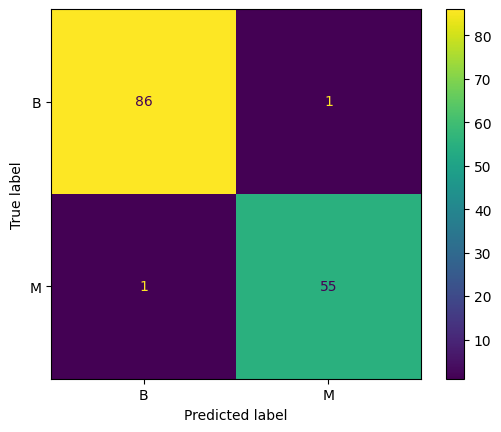

Logistic Regression testing accuracy:     98.6013986013986%


In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_lr)
plt.show()
print("Logistic Regression testing accuracy:     " + str(float(accuracy_score(y_test, test_preds_lr))*100) + "%")

<h3>2. Support Vector Machines</h3>

In [21]:
bcw_svm = SVC(kernel = 'linear', gamma = 'auto', probability = False)
bcw_svm.fit(X_train_scaled, y_train)
train_preds_svm = bcw_svm.predict(X_train_scaled)
print("SVM training accuracy:    " + str(float(accuracy_score(y_train, train_preds_svm)) * 100) + "%")

SVM training accuracy:    99.06103286384976%


In [20]:
%%timeit
test_preds_svm = bcw_svm.predict(X_test_scaled)

856 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


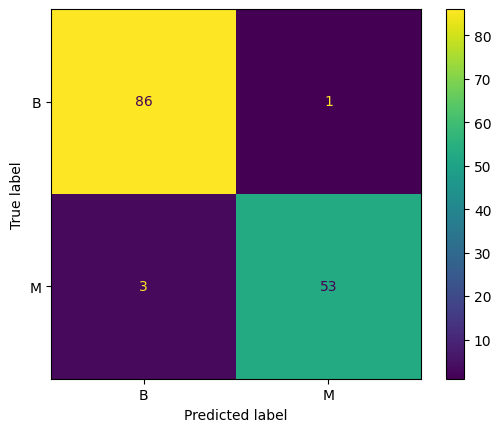

SVM testing accuracy:     97.2027972027972%


In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_svm)
plt.show()
print("SVM testing accuracy:     " + str(float(accuracy_score(y_test, test_preds_svm))*100) + "%")

<h3>3. Decision Tree</h3>

<h3>4. K-Nearest Neighbors</h3>